In [2]:
using JLD

num_threads_range = [1,2,3,4,6,8,12,16,32,64]
d = load("thread_data/1_threads.jld")

N_range =  d["N_range"]

total_elapsed_range = zeros((length(num_threads_range),length(N_range))) 

for (i,num_threads) in enumerate(num_threads_range)
	d = load("thread_data/$(num_threads)_threads.jld")

	N_range =  d["N_range"]
	total_elapsed_range[i,:] =  d["elapsed_range"]
	num_threads = d["num_threads"]
end


println(N_range)

println(total_elapsed_range)

[100,200,400,800,1600,2500]
[0.0044627077199999995 0.027400638445 0.19481847108 0.6414254055999999 1.5664829263333333 4.474536864
 0.003069698415 0.01610342659 0.11938493469999999 0.3439108385 0.9242959403333333 2.5450511270000002
 0.002549872185 0.012785759809999998 0.08753585881999999 0.2357021085 0.599240804 1.7538382536666666
 0.00267781996 0.012898675935 0.06701643384 0.1868834074 0.5236790426666666 1.3094722813333333
 0.00231224734 0.016055482725 0.07268550618 0.1438765994 0.34209802333333333 0.882624763
 0.0027580649899999997 0.02085140041 0.07830562444 0.10719877920000001 0.3126699 0.6883325003333334
 0.002744112735 0.021860560135 0.06421456472 0.08480561610000001 0.22234489733333332 0.5907406256666666
 0.0043787169749999995 0.038499185185 0.11092410638 0.11569589360000002 0.233975602 0.5018945616666667
 0.008584802945 0.039959596055 0.16128256732000001 0.1125427501 0.13636181233333333 0.4338473253333333
 0.01426590443 0.0226101137 0.1511102103 0.141475769 0.2630278013333333 0.

In [5]:
using PyPlot


INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/Reexport.ji for module Reexport.
INFO: Recompiling stale cache file /home/julian/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.


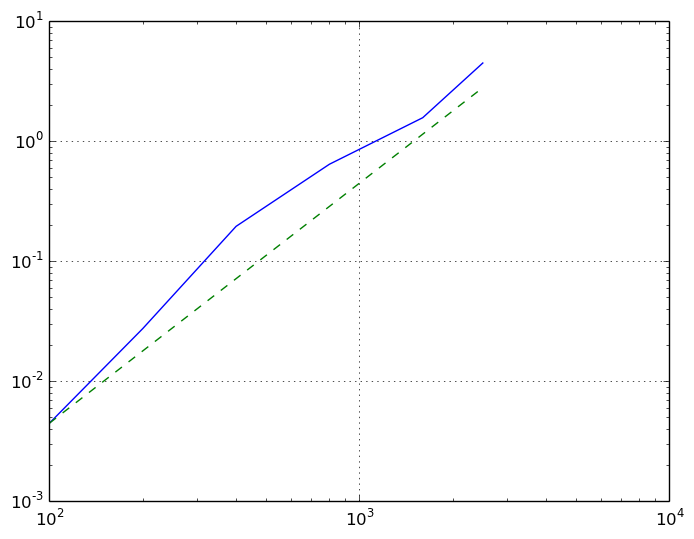

In [37]:
colors = ["r","b","g","c","y","k"]
for i in 1:1#size(total_elapsed_range)[1]
    loglog(N_range,total_elapsed_range[i,:]')
    loglog(N_range,total_elapsed_range[1,1]*N_range.^2./N_range[1]^2,"--")
end

grid()

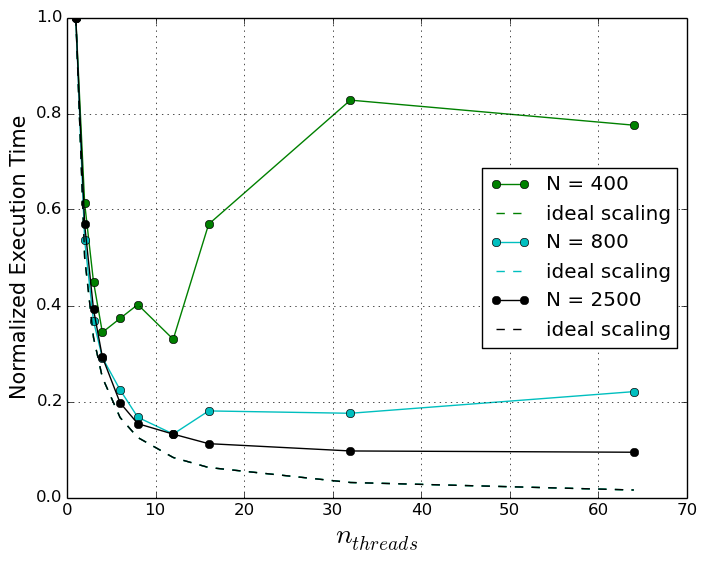

In [137]:
colors = ["r","b","g","c","y","k"]
for i in [3,4,6]#1:size(total_elapsed_range)[2]
    plot(num_threads_range,total_elapsed_range[:,i]/total_elapsed_range[1,i],"-o",label="N = $(N_range[i])",color=colors[i])
    plot(num_threads_range,1./num_threads_range,linestyle ="--",color=colors[i],label="ideal scaling")
end
grid()
legend(loc="center right")
xlabel(L"$n_{threads}$",size=20)
ylabel("Normalized Execution Time",size=15)
savefig("./figures/timing_vs_threads.png")

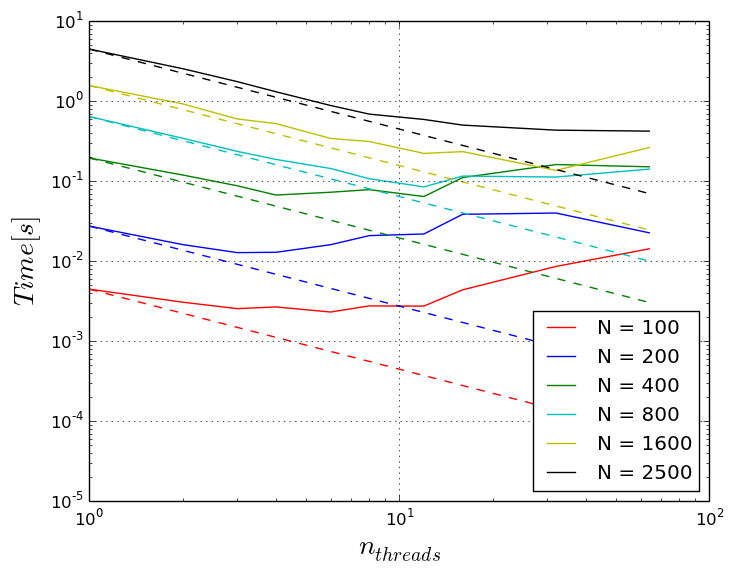

In [122]:
colors = ["r","b","g","c","y","k"]
for i in 1:size(total_elapsed_range)[2]
    loglog(num_threads_range,total_elapsed_range[:,i],label="N = $(N_range[i])",color=colors[i])
    loglog(num_threads_range,total_elapsed_range[1,i]./num_threads_range,linestyle ="--",color=colors[i])
end
grid()
legend(loc="lower right")
xlabel(L"$n_{threads}$",size=20)
ylabel(L"Time [s]",size=20)
savefig("../figures/timing_vs_threads_loglog.png",bbox_inches="tight")

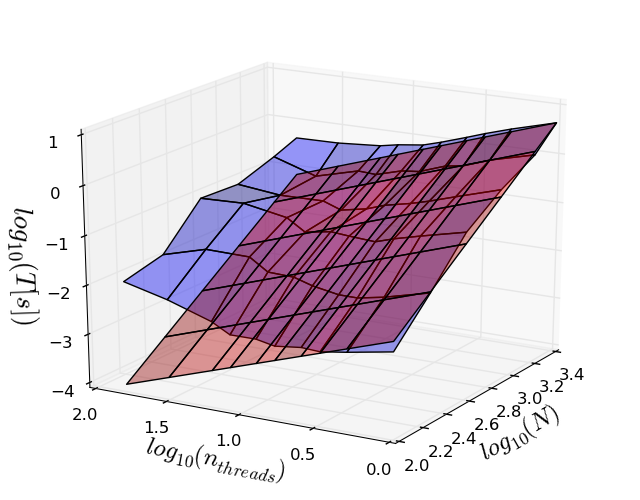

In [123]:
surf(log10(N_range),log10(num_threads_range),log10(total_elapsed_range),cstride=1,rstride=1,alpha=0.4,label="Timing")


ideal_timing = log10(total_elapsed_range[1,end]*1/N_range[end]^(2)*num_threads_range[1]*(N_range.^2)'./num_threads_range)

surf(log10(N_range),log10(num_threads_range),ideal_timing,cstride=1,rstride=1,alpha=0.4,color="r",label="ideal")


ylabel(L"$log_{10}(n_{threads})$",size=18)
xlabel(L"$log_{10}(N)$",size=18)
zlabel(L"$log_{10}(T [s])$",size=20)
gca()[:view_init](20,210)

#savefig("../figures/timing_surf_left.png",bbox_inches="tight")

In [95]:
run(`ls ..`)

data
figures
proposal
src
